In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade


Requirement already up-to-date: sklearn in /Users/mac/anaconda3/lib/python3.7/site-packages (0.0)


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
import matplotlib

In [3]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [4]:
import pandas as pd

# Read the CSV and Perform Basic Data Cleaning

In [5]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [6]:
# Set features. This will also be used as your x values.
X = df[['koi_period','koi_period_err1','koi_period_err2','koi_time0bk', 'koi_time0bk_err1','koi_time0bk_err2','koi_impact','koi_impact_err1','koi_impact_err2', 'koi_duration', 'koi_duration_err1','koi_duration_err2','koi_depth','koi_depth_err1','koi_depth_err2','koi_prad','koi_prad_err1','koi_prad_err2','koi_teq','koi_insol','koi_insol_err1','koi_insol_err2','koi_model_snr','koi_steff','koi_steff_err1','koi_steff_err2','koi_slogg','koi_slogg_err1','koi_slogg_err2','koi_srad','koi_srad_err1','koi_srad_err2','ra','dec','koi_kepmag']]


# Create a Train Test Split

Use `koi_disposition` for the y values

In [7]:
y = df.iloc[:,0]
y

0            CONFIRMED
1       FALSE POSITIVE
2       FALSE POSITIVE
3            CONFIRMED
4            CONFIRMED
5            CONFIRMED
6            CONFIRMED
7            CONFIRMED
8            CONFIRMED
9            CONFIRMED
10           CONFIRMED
11      FALSE POSITIVE
12      FALSE POSITIVE
13      FALSE POSITIVE
14           CONFIRMED
15           CONFIRMED
16      FALSE POSITIVE
17           CONFIRMED
18      FALSE POSITIVE
19           CONFIRMED
20           CONFIRMED
21           CONFIRMED
22      FALSE POSITIVE
23      FALSE POSITIVE
24      FALSE POSITIVE
25           CONFIRMED
26           CONFIRMED
27           CONFIRMED
28           CONFIRMED
29           CANDIDATE
             ...      
6961         CANDIDATE
6962    FALSE POSITIVE
6963    FALSE POSITIVE
6964    FALSE POSITIVE
6965    FALSE POSITIVE
6966    FALSE POSITIVE
6967         CANDIDATE
6968    FALSE POSITIVE
6969    FALSE POSITIVE
6970    FALSE POSITIVE
6971    FALSE POSITIVE
6972         CONFIRMED
6973    FAL

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
X_train.head()

,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6122,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,0.150,0.305,-0.150,3.61600,...,-171,4.327,0.153,-0.187,1.125,0.310,-0.207,294.40472,39.351681,14.725
6370,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,0.291,0.193,-0.291,2.30900,...,-175,4.578,0.033,-0.187,0.797,0.211,-0.056,284.50391,42.463860,15.770
2879,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,0.970,0.879,-0.942,79.89690,...,-189,4.481,0.050,-0.200,0.963,0.290,-0.097,295.50211,38.983540,13.099
107,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,0.300,0.145,-0.300,2.63120,...,-85,4.536,0.056,-0.016,0.779,0.023,-0.049,291.15878,40.750271,15.660
29,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,0.831,0.016,-0.004,2.22739,...,-77,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [31]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)



# Train the Model



In [32]:
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=35))
model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_scaled,y_train_categorical,epochs=60,shuffle=True,verbose=3)

Train on 5243 samples
Epoch 1/60
Epoch 2/60
Epoch 3/60
Epoch 4/60
Epoch 5/60
Epoch 6/60
Epoch 7/60
Epoch 8/60
Epoch 9/60
Epoch 10/60
Epoch 11/60
Epoch 12/60
Epoch 13/60
Epoch 14/60
Epoch 15/60
Epoch 16/60
Epoch 17/60
Epoch 18/60
Epoch 19/60
Epoch 20/60
Epoch 21/60
Epoch 22/60
Epoch 23/60
Epoch 24/60
Epoch 25/60
Epoch 26/60
Epoch 27/60
Epoch 28/60
Epoch 29/60
Epoch 30/60
Epoch 31/60
Epoch 32/60
Epoch 33/60
Epoch 34/60
Epoch 35/60
Epoch 36/60
Epoch 37/60
Epoch 38/60
Epoch 39/60
Epoch 40/60
Epoch 41/60
Epoch 42/60
Epoch 43/60
Epoch 44/60
Epoch 45/60
Epoch 46/60
Epoch 47/60
Epoch 48/60
Epoch 49/60
Epoch 50/60
Epoch 51/60
Epoch 52/60
Epoch 53/60
Epoch 54/60
Epoch 55/60
Epoch 56/60
Epoch 57/60
Epoch 58/60
Epoch 59/60
Epoch 60/60


In [33]:
model_loss, model_accuracy = model.evaluate(X_train_scaled, y_train_categorical, verbose=3)
print(f"Train Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Train Neural Network - Loss: 0.46882452207418335, Accuracy: 0.8029754161834717


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [34]:
# Create the GridSearchCV model
from sklearn.svm import SVC 
model2 = SVC(kernel='linear')
model2

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.0005, 0.001]}
grid = GridSearchCV(model2, param_grid, verbose=3, cv = 5)
grid

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.0005, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [36]:
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................... C=1, gamma=0.0001, score=0.741, total=   0.8s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.749, total=   0.8s
[CV] C=1, gamma=0.0001 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV] ................... C=1, gamma=0.0001, score=0.744, total=   0.8s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.733, total=   0.8s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ................... C=1, gamma=0.0001, score=0.742, total=   0.8s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.741, total=   0.8s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.749, total=   0.8s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.744, total=   0.8s
[CV] C=1, gamma=0.0005 ...............................................
[CV] ................... C=1, gamma=0.0005, score=0.733, total=   0.8s
[CV] C=1, gamma=0.0005 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.3min finished


{'C': 1, 'gamma': 0.0001}
0.7419416364676712


# Save the Model

In [37]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'models.sav'
joblib.dump(model, filename)

TypeError: can't pickle _thread._local objects

ValueError: x and y must be the same size

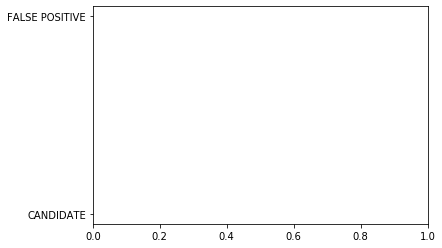

In [38]:
from matplotlib import pyplot as plt



X_train_scaled.shape
y_train.shape
plt.scatter(X_train, y_train)